# Linear models: classic and Bayesian approaches

In statistics, a linear model, or linear regression, is one way of describing the relationship between two variables. If we want to describe variable $Y$ as a function of variable $X$, a linear model would look like the following

$y_i = \alpha + \beta x_i + \varepsilon_i$,

where $\alpha$ and $\beta$ are, respectively, the intercept and coefficient, and $\varepsilon$ is a normal random variable with mean 0 and some variance $\sigma^2$.

For each observation $i = 1, 2, \ldots, N$ we observe values for $X$ and $Y$. Then, a statistical estimation procedure, such as least squares, is employed for obtaining estimates for the parameters $\alpha$, $\beta$ and $\sigma^2$.

The parameters have the following interpretations: the intercept $\alpha$ is the value $y_i$ would have, on average, if $x_i$ was set to zero; the coefficient $\beta$ is the size a change in $y_i$ would have if $x_i$ was changed by 1; and $\sigma^2$ is the variance of the error. 

The error is the portion of $y_i$ that is not explained by $x_i$, or the difference between the observed and expected values for $y_i$, based on the population mean. A closely related variable is the residual, which is conceptually similar to the error, but based on statistics estimated from the sample, and not the whole population, e.g., the sample mean instead of the population mean. The residuals are observable, and the errors are not. The residuals are an estimate of the error.

Our example is an univariate, simple linear regression, but it can be extended to multivariate models. 

One of the most common uses of linear regression is prediction. Having estimated the parameters with an observed dataset for $Y$ and $X$, if we have new observations with values for $X$, we could use the estimated parameters to predict what the values for $Y$ would be, on average.

There is an uncanny relationship between linear regression and hypothesis testing, two of the most important tools from introductory statistics. Most parametric and non-parametric tests from classical statistics can be visualized as special cases of regression. See: https://lindeloev.github.io/tests-as-linear/

For example, a simple t-test for the sample mean of a normal distribution can be imagined as a statistical test to see if the sample mean is an useful *predictor* of the observed data. As there are no covariates $X$, it is similar to regressing the values for $Y$ on a column of ones. The intercept of this model is the sample mean. 

In classical statistics, it is commonplace to perform t-tests for the regression parameters, and also an F-test for overall model significance.

Text(0.5, 0, 'x')

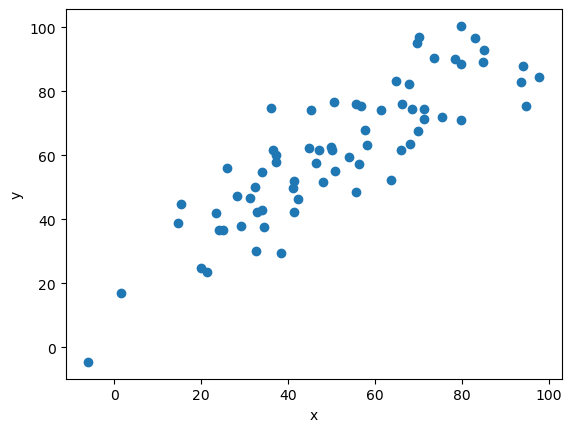

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
x = 50 + (np.random.randn(70) * 20)
y = 20 + (0.8 * x) + (np.random.randn(70) * 10)

plt.scatter(x,y)
plt.ylabel("y")
plt.xlabel("x")

In [2]:
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x)) # add_constant so that our model has an intercept
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     197.9
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           8.11e-22
Time:                        09:24:52   Log-Likelihood:                -265.40
No. Observations:                  70   AIC:                             534.8
Df Residuals:                      68   BIC:                             539.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1805      3.197      6.312      0.0

From the previous chapter, we already know the conceptual differences between classical and Bayesian statistics. The way Bayesians account for parameter uncertainty is one of the most important of them. 

So how does the Bayesian interpretation of a linear model differ from that of classical statistics?

Since our error variable, $\varepsilon$, has a normal distribution

$\varepsilon \sim N(0, \sigma^2)$,

and our observed values for $X$ are given, we can also write $Y$ as a normally distributed random variable

$Y \sim N(\alpha + \beta X, \sigma^2)$.

If we change $\alpha + \beta X$ to multivariate notation for $k$ covariates, and write it as $\mathbf{x}' \boldsymbol{\beta}$, with the first column of $\mathbf{x}$ being a column of ones (so that the model has an intercept), we now have a vector $\boldsymbol{\beta}$ of length $k+1$, containing the intercept plus coefficients for the $k$ covariates. We can also assume the covariance matrix for $Y$ to be of the form $\sigma^2 I$, where $I$ is an identity matrix. In this case our model has a total of $k+2$ parameters. 

We could assume conjugate prior distributions for these parameters. In this case the vector $\boldsymbol{\beta}$ would have a multivariate normal distribution and $\sigma^2$ would have an inverse-gamma distribution.

We could also use approximation methods such as MCMC to have more flexibility while specifying priors. Either way, Bayesian inference treats the parameters as random variables.

Here we shall estimate a model via MCMC using flat priors, i.e., priors with a very large standard deviation

In [3]:
import pymc as pm
import arviz as az

with pm.Model() as linear_model:
    alpha = pm.Normal('alpha', mu = 0, sigma = 1e4)
    beta = pm.Normal('beta', mu = 0, sigma = 1e4)
    sigma = pm.HalfCauchy('sigma', beta = 1e4)
    y_obs = pm.Normal('y', mu = alpha + (beta * x), sigma = sigma, observed = y)

    trace_lm = pm.sample(2000, tune=1000, target_accept=0.8, init='adapt_diag')
az.summary(trace_lm)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...


Initializing NUTS using adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 39 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,20.209,3.239,13.887,25.987,0.058,0.041,3127.0,3289.0,1.0
beta,0.795,0.057,0.685,0.902,0.001,0.001,3115.0,3394.0,1.0
sigma,11.115,0.978,9.271,12.857,0.015,0.011,4562.0,4332.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

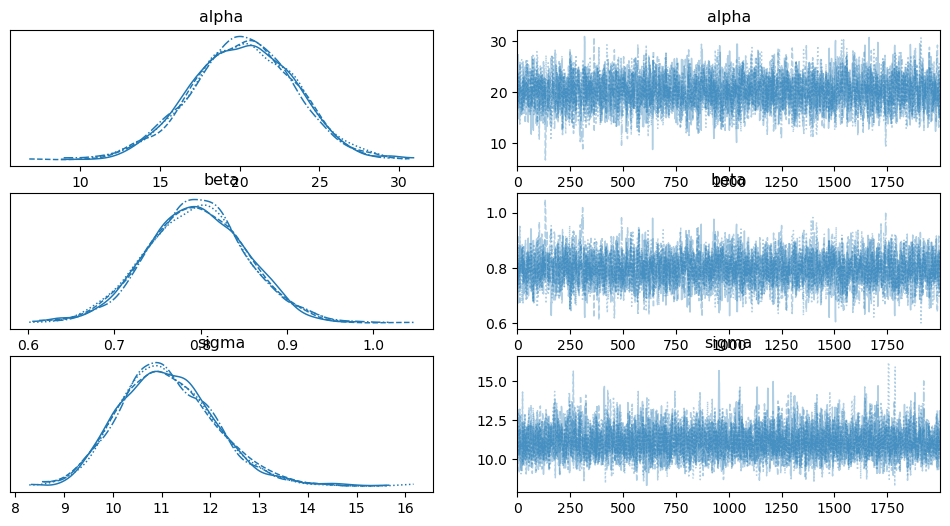

In [4]:
az.plot_trace(trace_lm)

## Flat versus regularizing priors

Tools from Bayesian data analysis can be helpful in specifying priors. We must always be mindful of the implications for the chosen prior distributions, even "noninformative" ones. 

For example, suppose we want to fit a linear model to analyse the relationship between height and weight, for example. If we specify weight (in kg) as a function of height (in cm), a coefficient of 1.5 would mean an increase of 1 cm in height would average an increase of 1.5 kg in weight. It is very important to remark that linear models in many cases do not have a causal interpretation, but, for simplicity, suppose there is a causal relationship between the two.

Suppose we pick the following "noninformative" prior for our regression coefficient

$\beta \sim U(-\infty, \infty)$.

This prior distribution has the implication that, if we draw a value from the prior distribution, every real number has the same probability of being observed. For example, suppose we draw from the prior distribution of $\beta$ the two following values: -5000, 2. Would you say, before observing any data, that those two values are equally likely to be the true value of the parameter in the underlying data generating process? 

A Bayesian data analysis technique called prior predictive checking can help us observe the implications of our chosen priors for the parameters even in situations where those might be difficult to imagine, e.g., complex models with tens of parameters. 

This can also be helpful for variable selection. Even a frequentist statistician might think, a priori, that linear models with an excess number of covariates might lead to things like spurious relationships and/or overfitting. In this case, said statistician would recur to regularization techniques.

Bayesian inference via MCMC makes it easy to impose regularization via prior distributions on the coefficients. Regularizing priors, or shrinkage priors, can be imposed via distributions that have more mass around zero. The Laplace prior on a regression coefficient corresponds to L1 regularization (LASSO) and the normal prior to L2 regularization (ridge).

Suppose we have three predictors, $x_1$, $x_2$ and $x_3$, but only $x_1$ has a causal relationship with $y$. Let's estimate a linear model with all three predictors, using regularizing priors for the coefficients.

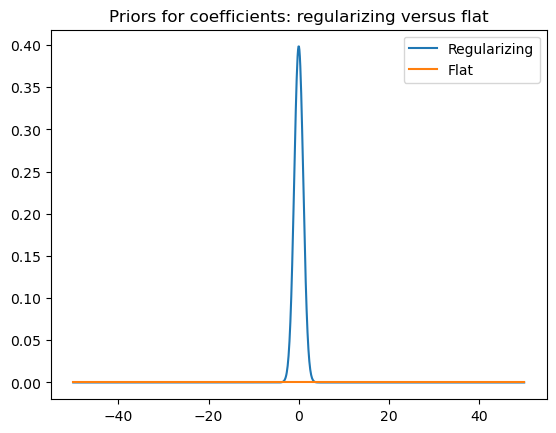

In [5]:
import scipy as sp

x = np.linspace(-50, 50, 1000)
plt.plot(x, sp.stats.norm.pdf(x, 0, 1), label="Regularizing")
plt.plot(x, sp.stats.norm.pdf(x, 0, 1e4), label="Flat")
plt.legend()
plt.title("Priors for coefficients: regularizing versus flat")
plt.show()

It is possible to control the effect of the regularization (i.e. how much the coefficient shrinks towards zero) via the standard deviation hyperparameter.

In [6]:
x1 = 50 + (np.random.randn(100) * 20)
x2 = 30 + (np.random.randn(100) * 25)
x3 = 65 + (np.random.randn(100) * 18)
y = 20 + (0.4 * x1) + (np.random.randn(100) * 10)

with pm.Model() as reg_model:
    alpha = pm.Normal('alpha', mu = 0, sigma = 1e4)
    beta_1 = pm.Normal('beta_1', mu = 0, sigma = 1)
    beta_2 = pm.Normal('beta_2', mu = 0, sigma = 1)
    beta_3 = pm.Normal('beta_3', mu = 0, sigma = 1)
    sigma = pm.HalfCauchy('sigma', beta = 1e4)
    y_obs = pm.Normal('y', mu = alpha + (beta_1 * x1) + (beta_2 * x2) + (beta_3 * x3), sigma = sigma, observed = y)

    trace_reg = pm.sample(2000, tune=1000, target_accept=0.8, init='adapt_diag')
az.summary(trace_reg)

Auto-assigning NUTS sampler...


Initializing NUTS using adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [alpha, beta_1, beta_2, beta_3, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 53 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,21.658,4.564,12.742,29.751,0.074,0.052,3818.0,4444.0,1.0
beta_1,0.326,0.057,0.221,0.435,0.001,0.001,5158.0,5369.0,1.0
beta_2,0.023,0.042,-0.056,0.102,0.001,0.000,5845.0,4989.0,1.0
beta_3,0.037,0.059,-0.073,0.147,0.001,0.001,4557.0,4539.0,1.0
sigma,10.022,0.738,8.726,11.446,0.009,0.006,6675.0,4965.0,1.0


## Generalized linear models (GLM)

Perhaps one of the most powerful statistical tools for applied research that not many applied researches know of are generalized linear models, or GLM. 

Recall that the standard linear model assumes that your dependent variable $Y$ follows a normal distribution. Depending on the nature of your variable of interest, this assumption might not be reasonable at all.

For example, if your variable of interest is a proportion, it can only assume values between 0 and 1, or, in case your variable is a counting process, it can only assume values in the positive integers (0, 1, 2...). Some variables cannot assume negative values, or are skewed towards positive values.

GLM lets you specify other distributions for the dependent variable, so long as the distributions are part of an exponential family. Some of the most common include binomial, Poisson and gamma distributions, for example. Logistic and Poisson regressions, as well as the standard linear regression, can be written as special cases of GLM. 

Generalized linear models also requires the specification of a link function $g(.)$. For a model with dependent variable $Y$ and covariates $X$, a GLM would look like

$\operatorname{E}[Y|X] = \mu$,

$X \beta = g(\mu)$.

There is a canonical link function for each distribution, but the specification of the link function might change on each application.

Unlike the standard linear regression, no analytical solutions for the estimators can be found, even in classical statistics. In order to obtain the maximum likelihood estimates, the most common estimation procedure in classical statistics, numerical optimization methods must be used.

In the case of Bayesian inference, no conjugate priors can be found. Therefore, computational methods such as MCMC must be used for Bayesian estimation of GLMs. 

For example, a logistic regression with logit link function could look like

$y_i \sim Bin(n = 10, p_i)$,

$p_i = g^{-1}(\alpha + \beta x_i)$.

As the link function $g(.)$ is a logit function, the inverse $g^{-1}(.)$ is the logistic (or expit) function. The logit function is of the form

$logit(x) = \ln \frac{x}{1-x}$,

and its inverse, the logistic has the form

$f(x) = \frac{1}{1+e^{-x}}$.

The logistic function maps values from the real line $(-\infty, \infty)$ to the interval $(0,1)$.

In [7]:
alpha_true = 1
beta_true = 0.7

x = np.random.randn(150)
p = sp.special.expit(alpha_true + (x * beta_true))
y = np.random.binomial(n = 10, p = p)

with pm.Model() as logistic_reg:
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta = pm.Normal("beta", mu=0, sigma=1)
    y_obs = pm.Binomial("y", n=10, p=pm.math.invlogit(alpha + beta*x), observed=y)
    trace_logistic = pm.sample(2000, tune=1000, target_accept=0.8, init='adapt_diag')
az.summary(trace_logistic)

Auto-assigning NUTS sampler...


Initializing NUTS using adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 33 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.143,0.064,1.025,1.267,0.001,0.001,7080.0,5927.0,1.0
beta,0.780,0.068,0.649,0.906,0.001,0.001,7109.0,5798.0,1.0


## Multilevel modelling

Another Bayesian approach for linear models is multilevel modelling. This is particularly useful when the data is divided into clusters, and the assumption that the data in one cluster contains information about the other clusters is valid. 

Also called hierarchical modelling or partial pooling, multilevel modelling provides more flexibility in such cases. It departs from both the assumptions that one cluster does not contain any information at all about others, or that the data in all clusters are drawn from the same distribution.

An example of Bayesian multilevel model would be

$Y_{i,j} \sim N(\mu_j, \sigma_{obs}^2)$

$\sigma_{obs} \sim Exp(1)$

$\mu_j \sim N(\theta, \sigma^2)$

$\sigma \sim Exp(1)$

$\theta \sim N(0,1)$

You can see the mean $\mu_j$ for the $j$th cluster is drawn from the same distribution. In the case there are linear predictors, $\mu_j$ can be of the form $\alpha_j + \beta_j X_{i,j}$. The model is multilevel so long as the data varies at more than one level, in this case for observation $i$ and cluster $j$.

In [8]:
np.random.seed(123)

theta_true = 0.6
sigma_true = 1
clusters = 8
mu_true = np.random.normal(theta_true, sigma_true, size=clusters)
sigma_obs_true = 0.3
Y = np.random.multivariate_normal(mu_true, sigma_obs_true**2 * np.eye(clusters), size = 30)#.flatten()

with pm.Model() as multilevel_reg:
    theta = pm.Normal("theta", 0, 1)
    sigma = pm.Exponential("sigma", 1)
    mu = pm.Normal("mu", theta, sigma, shape=clusters)
    sigma_obs = pm.Exponential("sigma_obs", 1)
    y_obs = pm.MvNormal("y", mu, sigma_obs*np.eye(clusters), observed=Y)
    trace_multilevel = pm.sample(2000, tune=1000, target_accept=0.8, init='adapt_diag')
az.summary(trace_multilevel)

Auto-assigning NUTS sampler...


Initializing NUTS using adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [theta, sigma, mu, sigma_obs]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 52 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.168,0.446,-0.616,1.055,0.005,0.005,9672.0,5235.0,1.0
mu[0],-0.415,0.055,-0.515,-0.307,0.001,0.000,12281.0,5860.0,1.0
mu[1],1.540,0.055,1.438,1.644,0.001,0.000,11703.0,5293.0,1.0
mu[2],0.928,0.057,0.821,1.030,0.001,0.000,10977.0,5882.0,1.0
mu[3],-0.967,0.055,-1.068,-0.863,0.000,0.000,12344.0,6196.0,1.0
mu[4],0.020,0.057,-0.086,0.125,0.001,0.001,12345.0,6264.0,1.0
mu[5],2.198,0.057,2.092,2.307,0.001,0.000,12004.0,5806.0,1.0
mu[6],-1.751,0.056,-1.854,-1.645,0.001,0.000,12051.0,6375.0,1.0
mu[7],0.146,0.055,0.042,0.249,0.001,0.000,11906.0,5762.0,1.0
sigma,1.376,0.372,0.775,2.046,0.004,0.003,9915.0,6255.0,1.0


There are many statistical tools that can help us choose between different linear models. In the case of classical statistics, a number of procedures, such as F-tests for overall significance, likelihood ratio tests and information criteria for goodness of fit, and cross-validation procedures for predictive ability.

It turns out there are Bayesian methods for model selection as well. Due to the fact that the outcome of Bayesian inference is the obtaining of the posterior distribution for each of the model parameters, which summarize all of the parameter uncertainty. This makes the usual t-tests for parameter significance reduntant. The Bayesian credibility intervals have a similar (and simpler) interpretation to that of the frequentist confidence intervals, as they rely on uncertainty regarding the parameters, and not just the sample.

The Bayesian equivalent of the likelihood ratio tests are the so-called Bayes factors. They account for not just the sample, via likelihood, but also the prior distributions. As a consequence of this, Bayes factors with uniform priors shall yield similar results to likelihood ratio tests, as the uniform distribution is proportional to a constant. The formula for the Bayes factor comparing model $\theta_1$ versus $\theta_2$ disposing of observed data $X$ is

$BF = \frac{P(X|\theta_1)}{P(X|\theta_2)} = \frac{P(\theta_1|X)}{P(\theta_2|X)}\frac{P(\theta_2)}{P(\theta_1)}$.

You can see that the first expression is similar to that of a likelihood ratio. The Bayes factor is also the link between prior and posterior odds for model $\theta_1$ versus $\theta_2$.

With the advance of Bayesian computational methods, calculating information criteria in a fully Bayesian way has also become more feasible. The Watanabe-Akaike information criterion (WAIC) relies on averaging over the whole posterior distribution, and not just posterior moments or maximum likelihood estimates. Cross-validation methods also become more computationally feasible. 

A number of graphical procedures have also been proposed. Since, in Bayesian inference, we dispose of the whole statistical model, we can use it to generate new data from the posterior predictive distribution, and compare it to our observed dataset. If the model is a good fit for the observed data, it should be able to generate more data that looks like it. This is the conceptual foundation of the procedure known as posterior predictive checking.

We will explore these procedures later on.

## Additional references for this section

Schervish, M. J., DeGroot, M. H. (2013). Probability and Statistics. Chapter 11 is an introduction of linear regression from a theoretical statistics perspective, also containing Bayesian interpretations of the linear regression model.

Thomas J. Sargent & John Stachurski. Linear Regression in Python: https://python.quantecon.org/ols.html. A great introduction to linear regression in Python, with focus on parameter interpretations and visualization.

McElreath, R. (2020). Statistical Rethinking: A Bayesian Course with Examples in R and Stan. Chapter 4 introduces linear models, Chapter 7 contains model comparison techniques, Chapter 11 introduces GLMs, and Chapters 13 and 14 introduce multilevel modeling.